# Final Project

## Collin Zheng, Swagata Chakroborty

# Table of Contents
1. Introduction
2. Library Importation
3. Data Wrangling
4. Exploratory Data Analysis
5. Conclusion
6. Resources

# 1. Introduction

In this tutorial we will be walking you through a couple data science concepts.
first we will curate the datas, then visualize the data and use it with machine learning
in order to make predictions/conclusions.

We will be using a set of data from kaggle and discover the possible causes related to heart diseases.

# 2. Library Importation and Python Setup

Here we import necessary libaries for our data tidying and visualizing.
You will need Python 3 and everything in the box under to properly go through the code and steps further in. 

In [1]:
import seaborn as sns
import geopandas
import pandas as panda
import numpy as nump
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import spearmanr

# 3. Data tidying

scrape the cvs data set, so we coupld manipulate it.we want to drop data that has missing entries but it actually turns out in this specific dataset there aren't any NaN values. This means that there's simply nothing to drop but we use .dropna() anyway. This is a function that will drop any missing entries in your data. Furthermore, if you wanted to look if there is something in your data that you do need to clean, (your_data_frame_here).isna().sum() will give you the total number of missing entries. Our orig_table variable stores all the data from our heart disease dataset. 

In [22]:
##We use the heart.csv dataset and use .read_csv to get our data and store it in our orig_table variable
orig_table = panda.read_csv('heart.csv')

## how many missing entries
empty_entries = orig_table.isna().sum()
## print out the missing entries
empty_entries

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Drop any missing entires to keep the data clean, since we dont have any missing data, we can sample the data table to see what it looks like. In the future if you do data science again, make sure to do this step before any operation to keep your data clean.

In [4]:
#.dropna() gets rid of all missing, null, and NAN entries
orig_table = orig_table.dropna()
orig_table.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1


Rearranging columns in the table (tidying the data) to make it better for visuallizing

In [5]:
orig_table = orig_table[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','sex', 
               'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]
orig_table

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,63,145,233,150,2.3,1,3,1,0,0,0,0,1,1
1,37,130,250,187,3.5,1,2,0,1,0,0,0,2,1
2,41,130,204,172,1.4,0,1,0,0,0,2,0,2,1
3,56,120,236,178,0.8,1,1,0,1,0,2,0,2,1
4,57,120,354,163,0.6,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,1,1,1,0,3,0
299,45,110,264,132,1.2,1,3,0,1,0,1,0,3,0
300,68,144,193,141,3.4,1,0,1,1,0,1,2,3,0
301,57,130,131,115,1.2,1,0,0,1,1,1,1,3,0


In [6]:
# To specify how many datapoints we have, we can use shape to get the number of rows and columns
# This means there are a total of 303 rows of data in our dataset and 14 columns of different 
# types of data as we saw from tables above
orig_table.shape

(303, 14)

One of the best ways to understand the data you are wrangling is to use the .info function. This will make it so that you get multiple useful pieces of information all in once little function so you don't have to specify everytime

In [8]:
orig_table.info 

<bound method DataFrame.info of      age  trestbps  chol  thalach  oldpeak  sex  cp  fbs  restecg  exang  \
0     63       145   233      150      2.3    1   3    1        0      0   
1     37       130   250      187      3.5    1   2    0        1      0   
2     41       130   204      172      1.4    0   1    0        0      0   
3     56       120   236      178      0.8    1   1    0        1      0   
4     57       120   354      163      0.6    0   0    0        1      1   
..   ...       ...   ...      ...      ...  ...  ..  ...      ...    ...   
298   57       140   241      123      0.2    0   0    0        1      1   
299   45       110   264      132      1.2    1   3    0        1      0   
300   68       144   193      141      3.4    1   0    1        1      0   
301   57       130   131      115      1.2    1   0    0        1      1   
302   57       130   236      174      0.0    0   1    0        0      0   

     slope  ca  thal  target  
0        0   0     1    

before we manipulate any data set, we need to know what type of data each type of entires are so we can use this function to check on it.

In [7]:
orig_table.dtypes

age           int64
trestbps      int64
chol          int64
thalach       int64
oldpeak     float64
sex           int64
cp            int64
fbs           int64
restecg       int64
exang         int64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## 4. Exploratory Data Analysis/VIsualization

What we want from this section is to be able to visualize different attributes with those who have heart disease so we can try to fidnd the correlation of them

First lets look at the gender.
Through this data outputted in the next box we can see that targets(0 being no heart disease and 1 being heart disease), has sex which are (0 being female and 1 being male), and we get the specific number of each gender. From here we can understand that there is a total of 96 females and 207 males

In [9]:
## Our first example can be from the sex/targets of the patients of the dataset. 
orig_table.groupby('target')['sex'].value_counts()

target  sex
0       1      114
        0       24
1       1       93
        0       72
Name: sex, dtype: int64

However, there is 24 total females without heart disease and 72 with heart disease
On the other hand, there are 114 males without heart disease and 93 with heart disease
We also just learned that there is much more males than females in the dataset as well which 
we will look at later in the project
In total, about 45.5% of patients don't have heart disease
On the other hand, about 54.5% of patients do have heart disease
This information was just from using the calculator and our previous labeling of the chart.
138/303 = without heart disease
165/303 = with heart disease

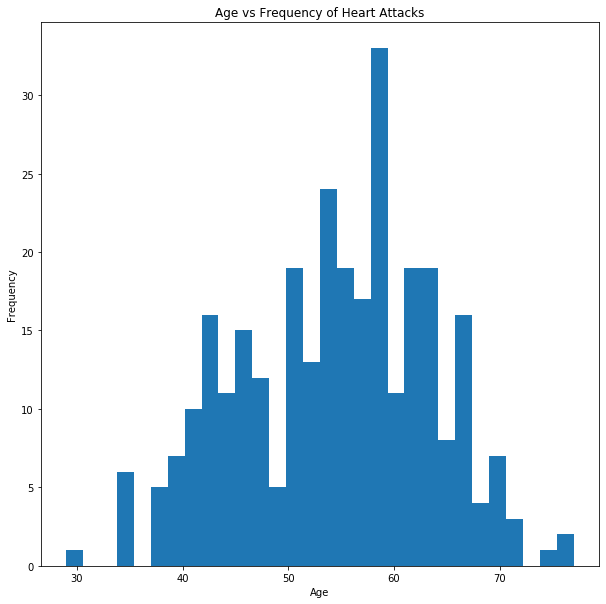

In [10]:
# now lets take a look at the age correlation to the frequncy of heart attacks
orig_table.age.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Age vs Frequency of Heart Attacks')
plt.xlabel('Age') 
plt.show()

We can see from this graph here that most of these patients peak around the 40-48 area and 50-56 area. The positive patients are honestly have a significant increase around the 40-50 area so if we see in future plots/information of a 40-50 year old we can assume that they are more likely than the other patients to have a heart disease.

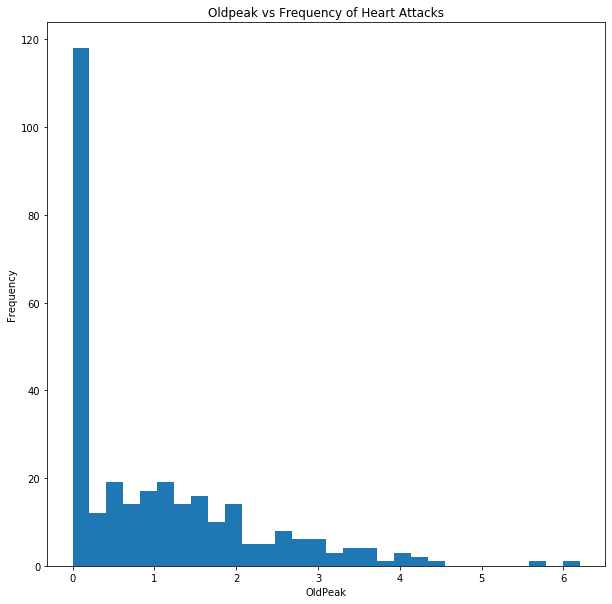

In [12]:
orig_table.oldpeak.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Oldpeak vs Frequency of Heart Attacks')
plt.xlabel('OldPeak') 
plt.show()
## Plot for OLDPEAK columns

We can see here that when there is 0 oldpeak, there is going to be the highest rate of heart disease. Thus those with higher OldPeak we are assuming that they are exercising so they have less chance of heart disease.

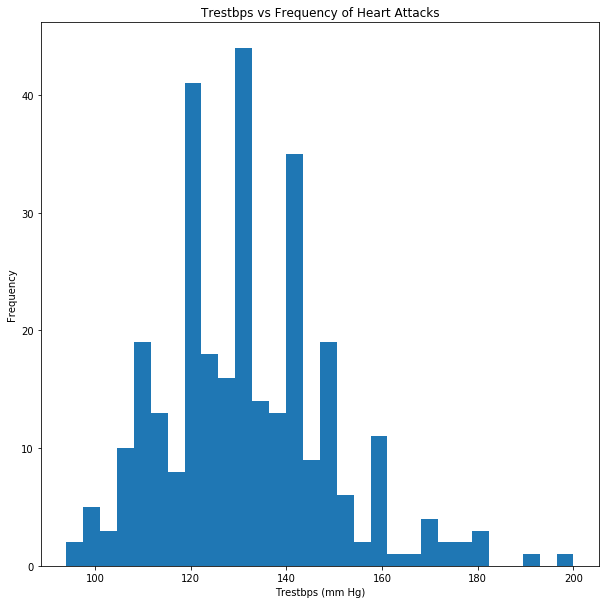

In [11]:
orig_table.trestbps.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Trestbps vs Frequency of Heart Attacks')
plt.xlabel('Trestbps (mm Hg)') 
plt.show()
## Plot for TRESTBPS column

Given the plotted data, there is a strong correlation between having a higher chance of a heart attack with resting blood pressure within the 120-160 range. This means that people with faster resting blood pressure have a higher risk of having a heart attack.

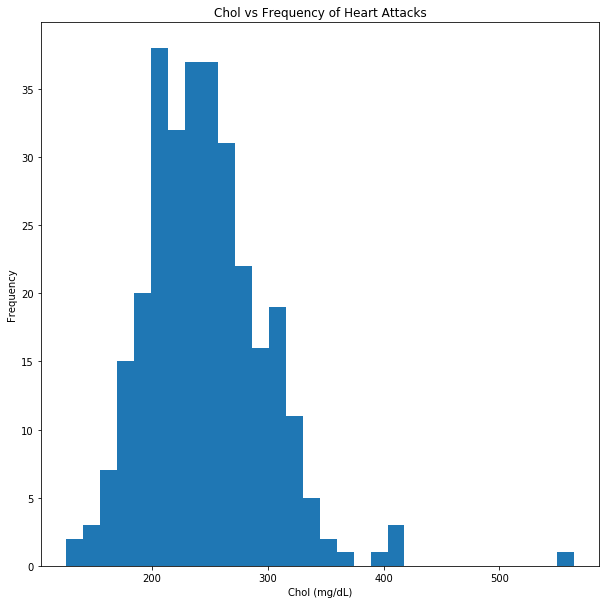

In [12]:
orig_table.chol.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Chol vs Frequency of Heart Attacks')
plt.xlabel('Chol (mg/dL)') 
plt.show()
## Plot for CHOL column

this graph shown that people who fall under the 150-350 mg/dL range for cholesterol have a higher chance of having a heart attack. The relation between higher concentrations of cholesterol does have a positive correlation to a higher frequency risks of heart attacks, with 250 mg/dL peaking at roughly 37%. It starts to decline after 250 mg/dL because any higher typically isn't very likely to obtain.Again, the range from 400-600 mg/dL is the far extreme range that people physically cannot fall under, meaning that 350 mg/dL would realisitcally be the "upper bound" for this specific scenario.

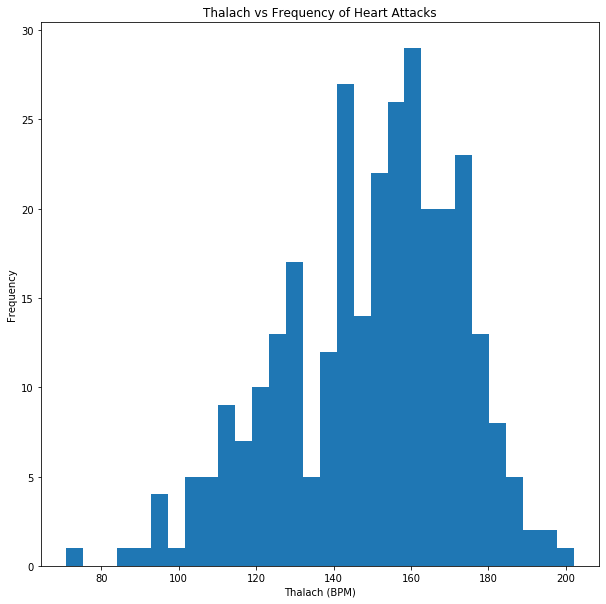

In [13]:
orig_table.thalach.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Thalach vs Frequency of Heart Attacks')
plt.xlabel('Thalach (BPM)') 
plt.show()
## Plot for THALACH column

The given plot shows a strong positive correlation between Thalach(maximum heart rate achieve) and heart attack likelihood. As you can see, the range between 100-170 BPM shows that those who have higher maximum heart rates have a higher likelihood of sustaining a heart attack, with the likelihood of a heart attack increasing as Thalach increases. The peak occurs at 160 BPM at 29%, indicating that this around this range, people are most likely to sustain a heart attack.

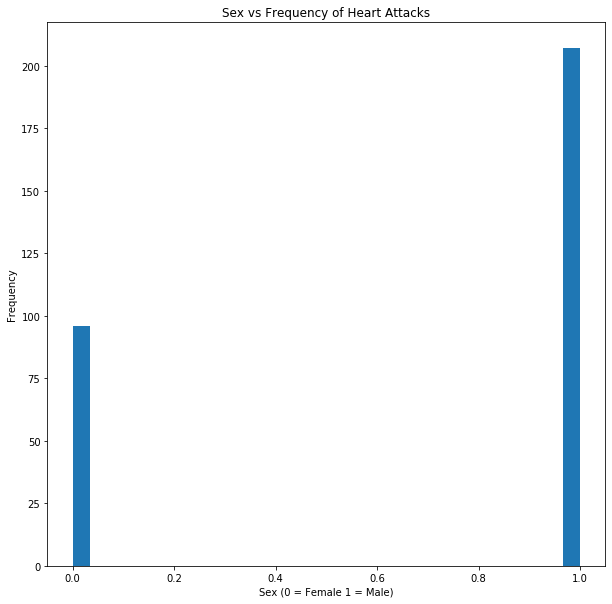

In [14]:
orig_table.sex.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Sex vs Frequency of Heart Attacks')
plt.xlabel('Sex (0 = Female 1 = Male)') 
plt.show()
## Plot for SEX column

this plot are showing that mens are twice more likely to have a heart attack than women

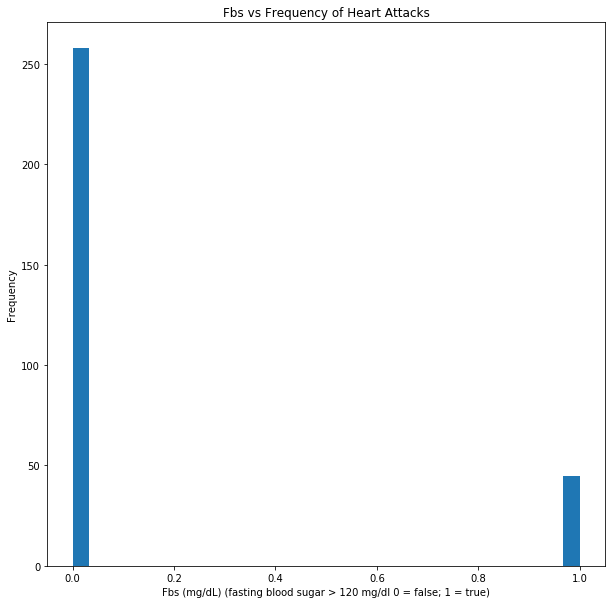

In [15]:
orig_table.fbs.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Fbs vs Frequency of Heart Attacks')
plt.xlabel('Fbs (mg/dL) (fasting blood sugar > 120 mg/dl 0 = false; 1 = true)') 
plt.show()
## Plot for FBS column

The given chart indicates if you have a fasting blood sugar level that is lower than 120 mg/dl, you have a higher ~500% higher likeihood of sustaining a heart attack. This is typically in relation to those with diabetes, indicating that those who are above the threshold, you are less likely to sustain a heart attack because of of the lack of dependence of insulin.

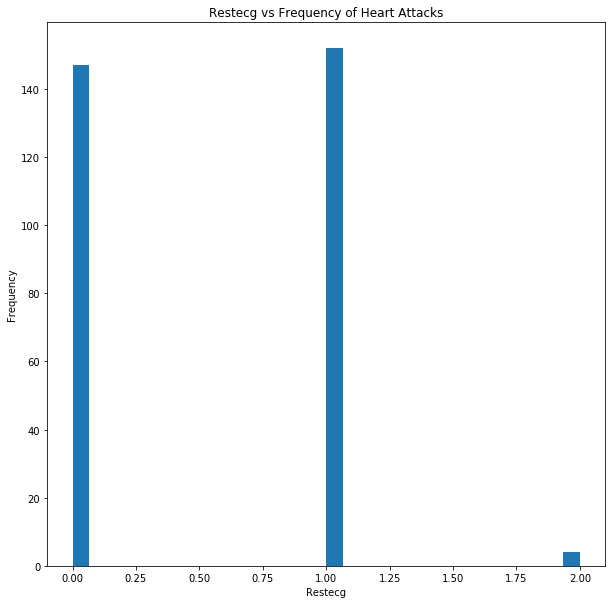

In [16]:
orig_table.restecg.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Restecg vs Frequency of Heart Attacks')
plt.xlabel('Restecg') 
plt.show()
## Plot for restecg column

We can see from this data that some of our columns such as age and trestbps look like they correlate with heart attacks. 
Columns such as sex, fbs are binary and don't really show anything through this.
Through these histograms, we can tell that our data can possibly correlate but it isn't precise
for all variables.

### Now we need to dig digger into the columns to find the possible correlation between these columns and heart attacks

The mean of thal is at 2.3135313531353137


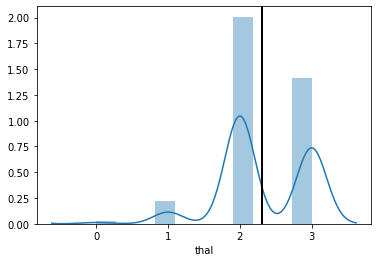

In [17]:
sns.distplot(a=orig_table['thal'])
plt.axvline(orig_table['thal'].mean(), color="black", linewidth=2)
print('The mean of thal is at {}'.format(orig_table['thal'].mean()))

it looks like theres clear correlation once the thal is high. 

The mean of cp is at 0.966996699669967


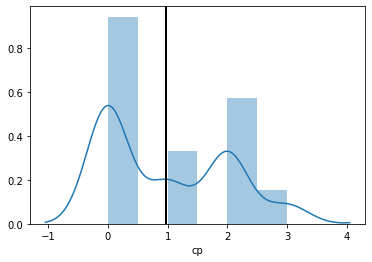

In [18]:
sns.distplot(a=orig_table['cp'])
plt.axvline(orig_table['cp'].mean(), color="black", linewidth=2)
print('The mean of cp is at {}'.format(orig_table['cp'].mean()))

Now for this one, there seems to be a variety of options and it doesnt look too straight forward as the data before.

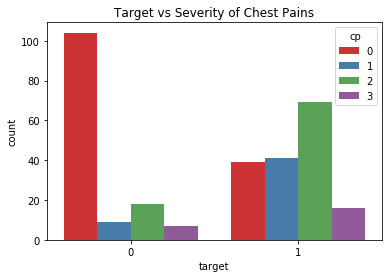

In [19]:
sns.countplot(x='target', hue= 'cp',data = orig_table, palette="Set1")
plt.title('Target vs Severity of Chest Pains')
plt.show()

Patients with chest pain of Type 2 or 3 have a higher chance than those with Type 1 or no chest pain at all

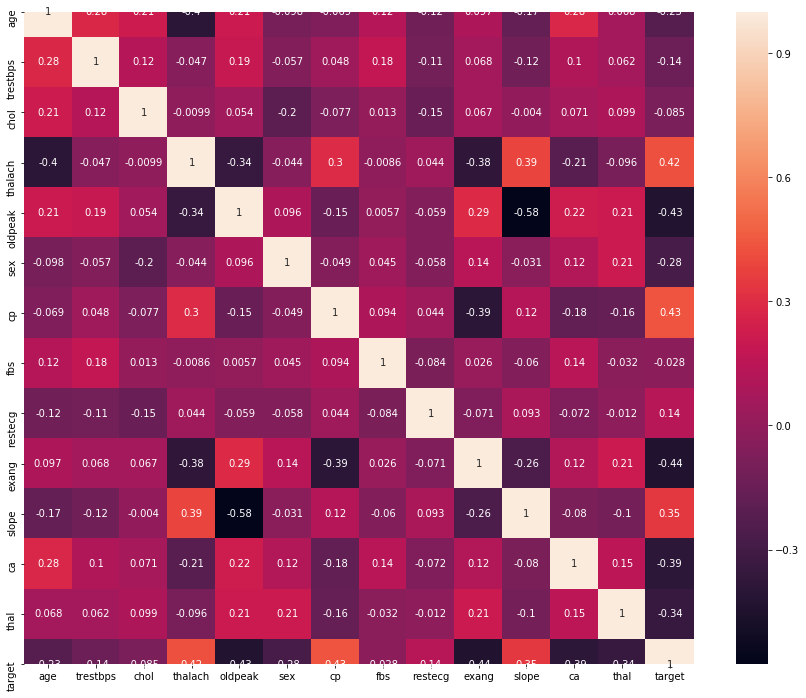

In [20]:
## plot all the correaltion into a heatmap
plt.figure(figsize=(15,12))
sns.heatmap(orig_table.corr(), annot=True)
plt.show()

From this visualization there's actually a positive correlation for chest pains,slope, and thalach
and the target as well as there is a negative correlation for gender, age, oldpeak, and more
These correlations let us understand what really is affecting the possibility of heart disease

### Use Pearsons Correlation Coefficient to see if we can understand the relationship between the variables and heart disease since there could be may correlations

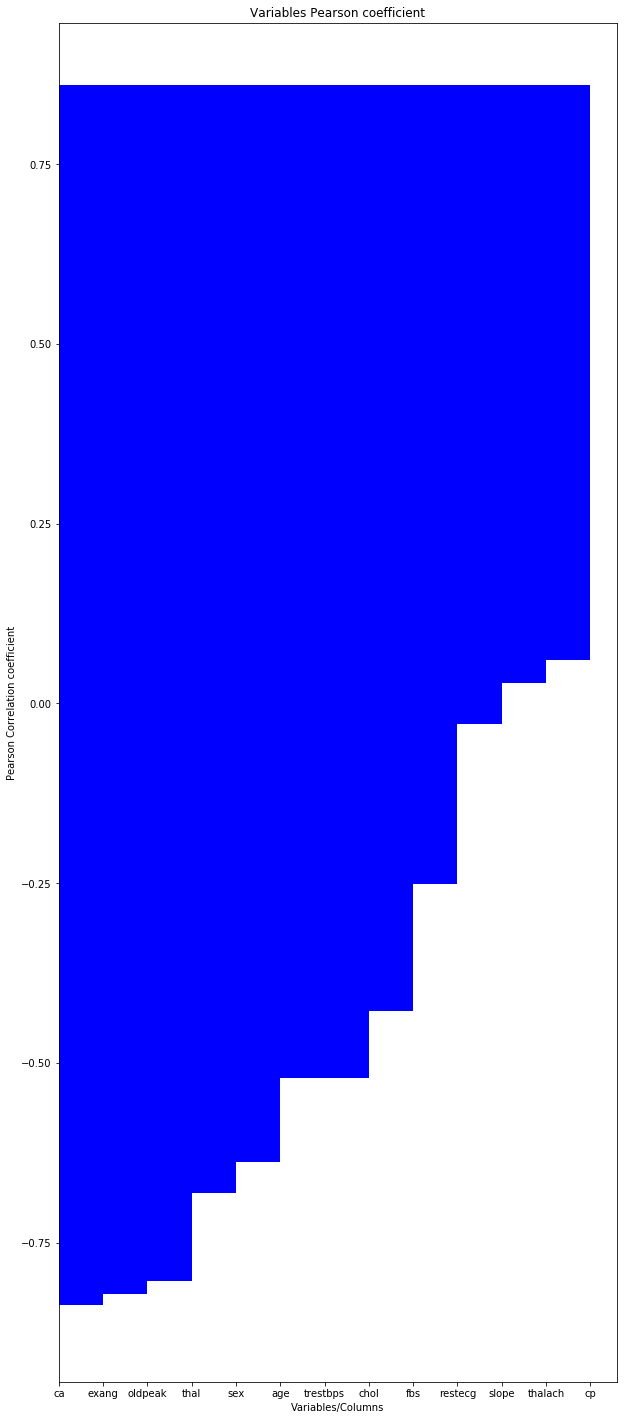

array([-0.45760748, -0.43675708, -0.42148706, -0.40329932, -0.28093658,
       -0.23840007, -0.12159275, -0.12088824, -0.02804576,  0.14861154,
        0.37146048,  0.42836989,  0.46086018])

In [21]:
axee = []
values = []
for col in orig_table.columns:
    if col not in ["target"]:
        axee.append(col)
        values.append(spearmanr(orig_table[col].values, orig_table["target"].values)[0])
duhf = panda.DataFrame({'corr_values':values, 'col_labels':axee})
duhf = duhf.sort_values(by='corr_values')
ind = nump.arange(duhf.shape[0])
width = 1.0
fig, axees = plt.subplots(figsize=(10,25))
rects = axees.barh(nump.array(duhf.corr_values.values), ind, color='b')
axees.set_xticks(ind)
axees.set_xticklabels(duhf.col_labels.values, rotation='horizontal')
axees.set_ylabel("Pearson Correlation coefficient")
axees.set_xlabel("Variables/Columns", rotation='horizontal')
axees.set_title("Variables Pearson coefficient")
plt.show()
nump.array(duhf.corr_values.values)

## Pearson Correlation Coefficient and Conclusion

We believe that there is a linear relationship between some of the variables and if there was a heart attack or not. The scores can range from -1 to 1, the closer to 0 the value is the less the association between the variables. In fact, most of the data that is further away from 0 is more correlated together. Thus, we can see from the data that the ca(number of major vessels colored by flourospy), exang, oldpeak, thal, cp, thalach are actually correlated.

by looking at the correaltions, we determined that:
1.Males have less chance of heart disease
2.Patients with chest pain of Type 2 or 3 have a higher chance than those with Type 1 or no chest pain at all
3.If a patient has exercise induced angina, then the probability of them having heart disease reduces
4.The higher the number of blood vessels that are visible by fluoroscopy, the lower the chances of heart disease

